# Supervised Machine Learning Systems - (Classification)

In [ ]:
# Helper functions to display a video or an image 
from IPython.display import HTML
def display_video(src):
    print('Source : '+src+ '?autoplay=1;modestbranding=1;rel=0')
    return HTML('<iframe width="800" height="400" src=' + src + '?autoplay=1;modestbranding=1;rel=0 frameborder="0" allowfullscreen></iframe>')

def display_image(src):
    print('Source : '+src)
    return HTML('<img width="600" height="300" src=' + src + '></img>')

def displayResults (y_test, predictions, n=10):
    Results = pd.DataFrame({'Actual': y_test})
    column = pd.DataFrame({'Predictions': predictions})
    Results = Results.join(column.set_index(Results.index))
    return Results.head(n)

def display_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

## What is a Classification Problem ?

We briefly talked about Classification problem in our previous notebook.

1. **Independent Variables for classification** - These are also called features of our dataset. They are the variables which when varied can affect our target classes that we want to predict.
2. **Dependent Variable for classification** - When your target variable has certain class labels, its a classification problem. For instance classifying pictures of dogs and cats or a tumour to be cancerous or non cancerous etc. You are not predicting a continuous quantity here but different classes.

Lets take an example to understand it clearly :

<b> [Breast Cancer Diagnostic] </b>

There are two main classifications of tumors. One is known as benign and the other as malignant. A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

In [ ]:
display_image('https://www.verywellhealth.com/thmb/xnYC1DVmfPtwjWCEdO0HjSZbcBo=/1787x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png')

Source : https://www.verywellhealth.com/thmb/xnYC1DVmfPtwjWCEdO0HjSZbcBo=/1787x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png


Our target it to train a Logistic Regression model that can predict whether the cancer is benign (B) or malignant (M).

Attribute Information:
<br>1) ID number 
<br>2) Diagnosis (M = malignant, B = benign) 
<br>3-32) Ten real-valued features are computed for each cell nucleus: 
<br>a) radius (mean of distances from center to points on the perimeter) 
<br>b) texture (standard deviation of gray-scale values) 
<br>c) perimeter 
<br>d) area 
<br>e) smoothness (local variation in radius lengths) 
<br>f) compactness (perimeter^2 / area - 1.0) 
<br>g) concavity (severity of concave portions of the contour) 
<br>h) concave points (number of concave portions of the contour) 
<br>i) symmetry 
<br>j) fractal dimension ("coastline approximation" - 1)

**`'Diagnosis'`** column is the **Dependent Variable or target column** because we want our algorithm to predict this class.

**`'1,3-32'`** are your **Features or Independent Variables** which will help you predict the Benign/Malignant class. Vary any one of them and it is going to affect your Diagnostic.

## Basic Intuition 

Now we will discuss about the Logistic Regression algorithm. Don't be confused by the name "Logistic Regression"; it is named that way for historical reasons and is actually an approach to classification problems, not regression problems.

Instead of our output vector y being a continuous range of values, it will only be 'M' or 'B'.

In [30]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the CSV file  ../Data/Breast_Cancer_Diagnostic.csv

In [31]:
# Loding the dataset into pandas dataframe and print the sample of first 5 rows

from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Data/Breast_Cancer_Diagnostic.csv'
#df = pd.read_csv('/Data/Breast_Cancer_Diagnostic.csv')
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,M


In [ ]:
df.shape

(569, 33)

*We will only consider ten real-valued features in this project for diagnostic!<br>
Let's separate the required features along with diagnosis column.*

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]

In [ ]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


In [ ]:
df.shape

(569, 11)

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Check if Any Null Values are there

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

## Load X and Y variables

In [ ]:
# Load the features to a variable X
# x is created by simply dropping the diagnosis column and retaining all others
X = df.drop('diagnosis', axis = 1)
# Load the dependent variable to y
y = df['diagnosis']

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
y.tail(10)

559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

## Split Test Train

**Train-Test split -** We split our data into two parts, namely, the train set and the test set (ideally its a 70-30 train-test split which is upto you). We then try to build our function f(x) (aka model) using the train set and see how well it does on the test set.   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
X_train.shape,X_test.shape

((398, 10), (171, 10))

## Create an Instance of the classifier

In [ ]:
# Let's create an instance for the LogisticRegression model
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(max_iter=200)

## Build the Model using Fit

In [ ]:
# Training the model on our train dataset
Classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Get the Predictions

In [ ]:
# Getting predictions from the model 
predictions = Classifier.predict(X_test)

In [ ]:
predictions

array(['M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

## Model Evaluation Techniques for Classification 

### 1. Get Accuracy, precision, Recall and F1 Scores

Accuracy is simply calculated as number of classes predicted right divided by total number of samples.

In [ ]:
# Getting classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,predictions)

print(report)

              precision    recall  f1-score   support

           B       0.90      0.91      0.90       108
           M       0.84      0.83      0.83        63

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



### 2. The confusion matrix

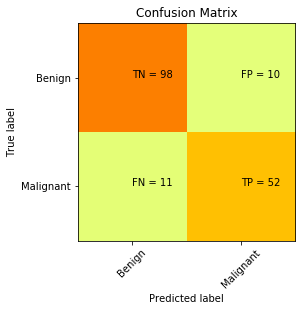

Accuracy  0.704225352112676
sensitivity or recall: 0.8253968253968254
precision 0.8387096774193549
specificity 0.9074074074074074


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
 
cm = confusion_matrix(y_test, predictions)
display_cm(cm)

# Assigning Variables for convinience
TN = 98
FP = 10
FN = 11
TP = 52

accuracy = (TP+TN) / float(TP+TN+FN + TP)
print('Accuracy ',accuracy)
sensitivity = TP / float(FN + TP)
print('sensitivity or recall:',sensitivity)
precision = TP / float(TP + FP)
print('precision',precision)
specificity = TN / (TN + FP)
print('specificity',specificity)

#### Positive Predictive Value or Precision : 
 When a positive value is predicted, how often is the prediction correct?
<br> How "precise" is the classifier when predicting positive instances?
<br><b>Sensitivity or Recall or True Positive Rate:</b> 
<br>When the actual value is positive, how often is the prediction correct?
<br>Something we want to maximize and Minimise FN
<br>How "sensitive" is the classifier to detecting positive instances?
<br>Also known as "True Positive Rate" or "Recall"
<br>TP / TP + FN (all positive)
#### Specificity:  When the actual value is negative, how often is the prediction correct?
Something we want to maximize
<br>How "specific" (or "selective") is the classifier in predicting positive instances?
<br>TN / TN + FP (all negative)

### Compare  a Sample of  Predictions to Actuals

In [ ]:
displayResults(y_test,predictions)


,Actual,Predictions
421,B,M
47,M,B
292,B,B
186,M,M
414,M,M
132,M,M
161,M,M
197,M,M
245,B,B
453,B,B


**Conclusion:**
<br>Our model is specific but not that sensitive.
<br>Confusion matrix gives you a more complete picture of how your classifier is performing
<br>Also allows you to compute various classification metrics, and these metrics can guide your model selection

Which metrics should you focus on?

Choice of metric depends on your business objective
Identify if FP or FN is more important to reduce
Choose metric with relevant variable (FP or FN in the equation)
Spam filter (positive class is "spam"):
Optimize for precision or specificity
precision
false positive as variable
specificity
false positive as variable
Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
Fraudulent transaction detector (positive class is "fraud"):
Optimize for sensitivity
FN as a variable
Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)
